In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
colors = ["#7e1e9c", "#75bbfd", "#dbb40c", "#fd3c06"]

# Epidemie e il loro tasso di riproduzione

In epidemiologia, il *[tasso netto di riproduzione](https://it.wikipedia.org/wiki/Tasso_netto_di_riproduzione)* di un'infezione, indicato con $R_{0}$, indica il numero di nuovi casi generati in media da un singolo caso durante il proprio periodo infettivo, in una popolazione che altrimenti non sarebbe infetta.

Questa misura è utile per determinare la possibilità di propagazione di un'infezione all'interno di una popolazione.

Se $R_{0}$ < 1 l'infezione sul lungo termine si estinguerà, mentre se $R_{0}$ > 1 l'infezione potrà diffondersi nella popolazione.

### Il covid-19 e il suo tasso netto di riproduzione
![corona](../icone/Corona.png)

<a href="https://iconscout.com/icons/corona" target="_blank">Corona Icon</a> by <a href="https://iconscout.com/contributors/laura-reen">Laura Reen</a> on <a href="https://iconscout.com">Iconscout</a>

Nel caso del covid-19, possiamo assumere che (quasi) tutta la popolazione mondiale sia suscettibile, visto che si tratta di un virus nuovo.
    
Ad oggi, si pensa che il tasso $R_{0}$ per il covid-19 sia intorno a 3.5($): questo significa che ogni persona infetta trasmetterà il virus ad altre 3.5 persone, **in media**, nell'arco del proprio tempo infettivo.

($) [articolo](https://doi.org/10.1016/S2214-109X%2820%2930074-7) (in Inglese); valori riportati tra 1.4 e 3.9; fare riferimento alla [pagina Wikipedia](https://en.wikipedia.org/wiki/Basic_reproduction_number) (in Inglese) per la completa (al momento) letteratura scientifica (ultima settimana di Marzo 2020).

Questo numero potrebbe, a prima vista, non sembrare molto alto.
Tuttavia, bisogna immaginare che se un paziente infetto contagia in media 3.5 altri soggetti, e ognuno di questi contagia a sua volta 3.5 soggetti, e ognuno di questi contagia a sua volta 3.5 soggetti (avrete capito dove vado a parare...) il numero di persone contagiate esploderà molto presto. Se pensiamo all'infinito, possiamo descrivere questo processo con una [serie geometrica](https://it.wikipedia.org/wiki/Serie_geometrica), che possiamo risolvere nel seguente modo:  

In [16]:
import math
import numpy as np

In [15]:
x = 3.5 # la 'ragione' della nostra serie
n = 10 # numero di iterazioni (1 soggetto ne infetta 3.5 - ciascuno di questi 3.5 etc etc x 10)
print(f'somma della serie geometrica = {1 - math.pow(x, n + 1) / (1 - x)}')

somma della serie geometrica = 88574.5


Non so se vi è capitato di vedere questo [tweet](https://twitter.com/chris_csernica/status/1241961822233612293): il professore e medico [Montgomery](https://en.wikipedia.org/wiki/Hugh_Montgomery_%28physician%29) spiega che se $R_{0}$ per il covid-19 fosse uguale a 3, in 10 iterazioni si potrebbero infettare fino a 59000 persone. La matematica in realtà non è proprio così, come [qualcuno ha fatto notare](https://twitter.com/martyn_bailey/status/1242072409299210240) il numero esatto è 88500, che è quello che si ottiene se si sostituisce `x = 3` alla formula precedente.
 
Una progressione geometrica non nulla come quella che abbiamo visto mostra dunque una crescita esponenziale come quella rappresentata qui sotto; di queste crescite esponenziali se ne viste parecchie, purtroppo, intorno ai dati del covid-19.

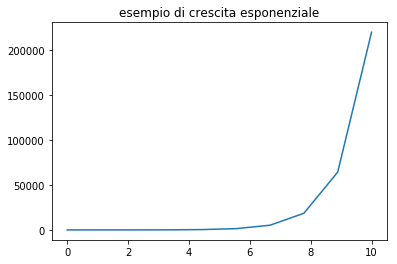

In [28]:
t = np.linspace(0, 10, 10)
y = t * np.exp(t)
plt.plot(t,y)
plt.title('esempio di crescita esponenziale');

Ora, è evidente che sia la serie geometrica che questo modello di crescita esponenziale esagerino un po': nella realtà, non tutti i soggetti vengono a contatto con qualcuno e bisogna tenere in conto che viviamo in comunità più o meno definite (anche se le distanze nel mondo si sono di certo accorciate di molto). Tuttavia, nuove epidemie, specialmente all'inizio si diffondono seguendo questo mdodello, perché non sono presenti meccanismi di immunizzazione.

Adesso vedremo qualche modello matematico in uso per la comprensione di epidemeie come quella del covid-19.
Questi modelli vengono definiti *modelli a cmpartimenti*: i soggetti vengono suddivisi in base a certe categorie, raggruppati in compartimenti,  e si studiano i passaggi da un compartimento all'altro. 

## Modello 1: modello epidemiologico SIR

Il [modello epidemiologico SIR](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model) suddivide la popolazione in 3 categorie:

- S: soggetti suscettibili ma non ancora infetti (individui sani passibili di contagio)
- I: soggetti infetti (in grado di trasmettere il contagio)
- R: soggetti rimossi (guariti o morti)

Il modell SIR si serve di due parametri per descrivere l'evoluzione di un'epidemia: β (beta) e γ (gamma).

**β** descrive il tasso di infezione: un soggetto infetto viene a contatto con altri βN soggetti in una unità di tempo (ad esempio un giorno), e di questi βN soggetti, S/N saranno suscettibili al contagio (si possono cioè ammalare).

**γ** invece è il tasso medio di guarigione: 1/γ è l'arco di tempo medio durante il quale un soggetto infetto può contagiare altri soggetti.

Il modello SIR è descritto dalle seguenti equazioni differenziali:

1. dS/dt = -βSI / N
2. dI/dt = βSI / N - γI
3. dR/dt = γI

Ciascuna di queste equazioni descrive il comportamento nel tempo delle tre categorie di soggetti. Da notare che in questo modello non si assumono altri eventi demografici (nascite, morti), la popolazione è cioè definita chiusa.

Da notare, ancora, l'assenza di misure profilattiche quali quarantine, riduzione del contatto tra soggetti suscettibili, o una campagna di vaccinazioni.

Andiamo a vedere le curve epidemiologiche dei soggetti S, I ed R, e il loro andamento nel tempo.

In [29]:
import sys
sys.path.append('../')

In [30]:
import modelli as md

In [31]:
# supponiamo di avere una popolazione totale di 10k persone
N = 10000
# suppuniamo inoltre che il numero iniziale di contagiati sia 1
I0 = 1
# il numero iniziale di rimossi è zero
R0 = 0
# i soggetti a rischio di infezione sono quindi
S0 = N - I0 - R0

In [47]:
# beta: tasso di infezione
beta = 0.7
# gamma: tasso medio di guarigione - supponiamo sia 5 giorni
gamma = 1./5

R0 = beta / gamma
print(f'R0 = {R0:.1f}')
# arco di tempo in giorni
t = np.linspace(0, 150, 150)

R0 = 3.5


In [49]:
y0 = S0, I0, R0
S, I, R = md.resolve_SIR(y0, t, N, beta, gamma)

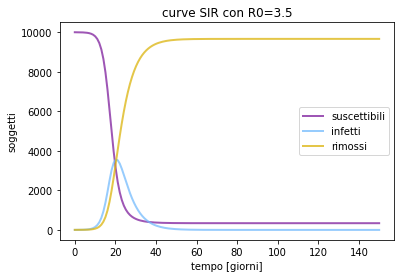

In [50]:
plt.plot(t, S, colors[0], alpha=0.75, lw=2, label='suscettibili')
plt.plot(t, I, colors[1], alpha=0.75, lw=2, label='infetti')
plt.plot(t, R, colors[2], alpha=0.75, lw=2, label='rimossi')
plt.xlabel('tempo [giorni]')
plt.ylabel('soggetti')
plt.legend()
plt.title(f'curve SIR con R0={R0:.1f}');

**Come si legge questo grafico?**

Questo grafico illustra l'andamento nel tempo delle tre categorie di persone previste dal modello.

In particolare, il modello descrive un picco di contagiati intorno al ventesimo giorno dall'inizio dell'epidemia, con un numero di infetti intorno a 4000.

Nel modello SIR, dopo essersi ammmalato, un soggetto può guarire o morire; inoltre, se guarito, il soggetto non può essere nuovamente contagiato (diventa, cioè immune).

Col passare del tempo è naturale che il numero di soggetti suscettibili diminuisca; il tasso di crescita di un'epidemia **in corso** si chiama **tasso di riproduzione effettivo**, $R_{e}$.

Quando $R_{e}$ < 1, l'epidemia smette di diffondersi.

![](../icone/world.png)

<a href="https://iconscout.com/icons/world" target="_blank">World Icon</a> by <a href="https://iconscout.com/contributors/marioK" target="_blank">Mario Köstl</a>

Tutto quello che abbiamo detto fino ad ora presuppone una _popolazione chiusa_; nel mondo reale, ovviamente, non funziona così: la gente si muove e un soggetto infetto potrebbe lasciare il nostro gruppo di 4000 persone e trasmettere il virus ad un'altra popolazione in un'altra città, un altro Paese... 

Prima di passare ad un altro modello, diamo uno sguardo ad un virus che tutti conosciamo: quello che causa il **morbillo**.
Il morbillo è una malattia altamente contagiosa, per la quale $R_{0}$ è stato estimato in un intervallo di valori tra 12 e 18: dato che ciascuna persona infetta può trasmettere il virus fino a 18 persone (in media), è facile immaginare come il virus infetti tutta la popolazione in un arco di tempo parecchio ristretto.

Vediamo come sono le curve SIR per un'epidemia come quella del morbillo.

In [51]:
# supponiamo di avere una popolazione totale di 10k persone
N = 10000
# suppuniamo inoltre che il numero iniziale di contagiati sia 1
I0 = 1
# il numero iniziale di rimossi è zero
R0 = 0
# i soggetti a rischio di infezione
S0 = N - I0 - R0
beta = 1.8
gamma = 1./10
R0 = beta / gamma
print(f'R0 = {R0}')
# una grid di punti (in giorni)
t = np.linspace(0, 60, 60)

R0 = 18.0


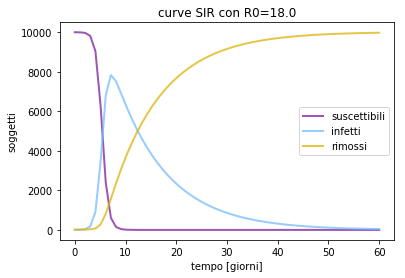

In [52]:
y0 = S0, I0, R0
S, I, R = md.resolve_SIR(y0, t, N, beta, gamma)
plt.plot(t, S, colors[0], alpha=0.75, lw=2, label='suscettibili')
plt.plot(t, I, colors[1], alpha=0.75, lw=2, label='infetti')
plt.plot(t, R, colors[2], alpha=0.75, lw=2, label='rimossi')
plt.xlabel('tempo [giorni]')
plt.ylabel('soggetti')
plt.legend()
plt.title(f'curve SIR con R0={R0}');

Il picco di persone infette, in questo caso, si raggiunge intorno all'ottavo giorno, con un numero di contagiati intorno a 8000 persone.

**Attenzione, però!** Questa è una simulazione in cui nessun soggetto è stato sottoposto al vaccino contro il morbillo!

Un'epidemia di questo tipo può infatti essere contenuta con una **campagna di vaccinazione**: l'Organizzazione Mondiale della Sanità ci dice che nel 2018 circa l'86% dei bambini al mondo al di sotto dei 2 anni è stato vaccinato contro il virus del morbillo (dati [qui](https://www.who.int/immunization/newsroom/new-measles-data-august-2019/en/) in Inglese).

Questi modellini (molto semplici!) ci mostrano come fa un'epidemia a finire (anche senza intervento umano): col passare del tempo, il virus non ha semplicemente più soggetti suscettibili da infettare. Ovviamente, non dobbiamo di certo aspettare che un virus faccia il suo corso naturale per ridurre l'epidemia e i suoi effetti: misure come **igiene personale**, **quarantene**, **distanze interpersonali**, possono essere adoperate per limitare il rischio di contagio tra soggetti suscettibili (lì dove non fossero ancora disponibili vaccinazioni, come nel caso del covid-19).

Vedremo l'effetto di queste misure con il prossimo modello epidemiologico.

## Modello 2: modello epidemiologico SEIR

Il modello epidemiologico SEIR è un'estensione del modello SIR che abbiamo visto finora.

Questo modello prevede la presenza di tre categorie di soggetti: 

- S: soggetti suscettibili ma non ancora infetti (individui sani passibili di contagio)
- E: soggetti esposti al contagio (soggetti che vengono in contatto con individui infetti)
- I: soggetti infetti (in grado di trasmettere il contagio)
- R: soggetti rimossi (guariti o morti)

Questo modello aggiunge un periodo di latenza allo sviluppo del contagio: gli individui E che sono esposti all'epidemia sono stati a contatto con persone infette, ma non sono state necessariamente contagiate. 

Il modell SEIR si serve di tre parametri per descrivere l'evoluzione di un'epidemia, β (beta), γ (gamma) (abbiamo visto questi due nel modello SIR) e **α** (alpha), che è l'inverso del tempo medio di incubazione, cioè del periodo che intercorre tra quando un individuo è stato contagiato e quando diviene contagioso a sua volta.

Il modello è descritto dalle seguenti equazioni differenziali:

1. dS/dt = -βSI / N
2. dE/dt = βSI / N - αE
2. dI/dt = αE - γI
3. dR/dt = γI

Per il covid-19, il periodo di incubazione sembra essere in media di 5 giorni (si veda questo [articolo](https://doi.org/10.1016/S2214-109X%2820%2930074-7) e [questo](https://doi.org/10.1101/2020.01.27.20018986) (_non peer-reviewed_)).

In [58]:
# periodo di incubazione: 5 giorni
alpha = 1 / 5.
# popolazione totale
N = 10000

# supponiamo una persona sia inizialmente esposta al contagio
E0 = 1
I0 = 0
R0 = 0
S0 = N - E0 - I0 - R0

In [64]:
# beta: tasso di infezione
beta = 1.75
# gamma: tasso medio di guarigione
gamma = 1./2

R0 = beta / gamma
print(f'R0 = {R0}')
# arco di tempo in giorni
t = np.linspace(0, 100, 100)

R0 = 3.5


In [65]:
y0 = S0, E0, I0, R0

In [66]:
S, E, I, R = md.resolve_SEIR(y0, t, N, beta, gamma, alpha)

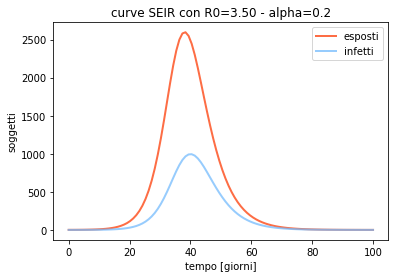

In [67]:
plt.plot(t, E, colors[3], alpha=0.75, lw=2, label='esposti')
plt.plot(t, I, colors[1], alpha=0.75, lw=2, label='infetti')
plt.xlabel('tempo [giorni]')
plt.ylabel('soggetti')
plt.legend()
plt.title(f'curve SEIR con R0={R0:.2f} - alpha={alpha}');

Il modello SEIR mostra un picco di contagiati intorno al quarantesimo giorno dall'inizio dell'esposizione, con un numero di infetti pari a circa 1000 (10% della popolazione).

**NOTA** (grande come una casa!) -> non mi voglio soffermare sui numeri effettivi, né sul valore dei parametri del modello: specialmente quando un'epidemia è ancora in corso, è molto complicato ottenere una stima esatta. Quello che mi preme è mostrare come queste curve possono cambiare (in meglio!!!) con un po' di accorgimenti.

![](../icone/Social Distance.png)

<a href="https://iconscout.com/icons/social-distance" target="_blank">Social Distance Icon</a> by <a href="https://iconscout.com/contributors/labdsgn" target="_blank">LAB Design Studio</a>

## Il modello SEIR e il distanziamento sociale


Quando non si hanno ancora vaccini a disposizione, come accennato prima, ci sono altre misure profilattiche alle quali si può ricorrere per far fronte ad un'epidemia come quella del covid-19. Una di queste è quella del [**distanziamento sociale**](https://it.wikipedia.org/wiki/Distanziamento_sociale). In sostanza, con il distanziamento sociale si prova a diminuire la probabilità di contatto di persone portatrici del virus con individui non infetti, così da ridurre al minimo la trasmissione della malattia.

Andremo adesso ad introdurre un nuovo parametro nel nostro modello SEIR, per simulare un'azione preventiva di questo genere. Questo prametro, **ρ**, che chiameremo *indice di distanziamento sociale* andrà a modificare l'evoluzione di suscettibili ed esposti, e può avere un valore da 0 (in questo caso tutta la popolazione è in quarantena, completo *lock down*) ad 1 (nessun distanziamento sociale, torniamo al caso di prima). 

Le equazioni del modello diventano:

1. dS/dt = -ρβSI / N
2. dE/dt = ρβSI / N - αE
2. dI/dt = αE - γI
3. dR/dt = γI

In [68]:
# testiamo un po' di valori di ρ per vedere l'effetto
rho_values = [1.0, 0.8, 0.5]

In [69]:
# periodo di incubazione: 5 giorni
alpha = 1 / 5.
# popolazione totale
N = 10000

# supponiamo una persona sia inizialmente esposta al contagio
E0 = 1
I0 = 0
R0 = 0
S0 = N - E0 - I0 - R0

In [70]:
# beta: tasso di infezione
beta = 1.75
# gamma: tasso medio di guarigione
gamma = 1./2

R0 = beta / gamma
print(f'R0 = {R0}')
# arco di tempo in giorni
t = np.linspace(0, 200, 200)

R0 = 3.5


In [71]:
y0 = S0, E0, I0, R0

In [72]:
results = {}

#risolviamo le eq diff e salviamo i risultati
for rho in rho_values:
    S, E, I, R = md.resolve_SEIR_dist(y0, t, N, beta, gamma, alpha, rho)
    results[rho] = (S, E, I, R)

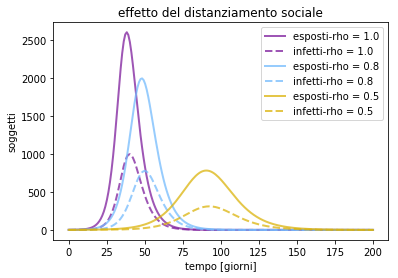

In [74]:
# andiamo a plottare le curve Esposti-Infetti per i valori di ρ scelti
for index, (rho, (S, E, I, R)) in enumerate(results.items()):
    plt.plot(t, E, alpha=0.75, lw=2, color=colors[index], 
             label=f'esposti-rho = {rho}')
    plt.plot(t, I, alpha=0.75, lw=2, ls='--',
             color=colors[index], 
             label=f'infetti-rho = {rho}')
    
plt.xlabel('tempo [giorni]')
plt.ylabel('soggetti')
plt.legend()
plt.title('effetto del distanziamento sociale');

Vediamo chiaramente che man mano che ρ diminuisce (più e più persone stanno a casa), le curve si spostano verso destra, cioè si rallenta il processo del contagio. Questo fenomeno è noto come **flatten the curve**, cioè **appattire la curva**.

Ma perché questa cosa è così importante? Perché appiattendo la curva del contagio si permette ai vari sistemi sanitari nazionali di affrontare l’emergenza, anziché soccombervi.

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c5/Covid-19-curves-graphic-social-v3.gif" width="450" align="center">

Gif: https://upload.wikimedia.org/wikipedia/commons/c/c5/Covid-19-curves-graphic-social-v3.gif